# Purpose
1. 請為客戶進行貼標，並依其特性進行命名，以幫助行銷部門推出新產品和制定行銷方式。
2. 請先進行降維後再分群(依你的判斷選擇降維和分群的方法)

In [24]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

# 1. import data

In [25]:
df = pd.read_csv('segmentation_data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


#### ID：顯示客戶的唯一標識。

#### Sex：
0：男性        
1：女性        

#### Marital status：客戶的婚姻狀況。
0：單人        
1：非單身（離婚/分居/已婚/喪偶）        

#### Age：客戶的年齡（以年為單位），計算方法為當年減去創建數據集時客戶的出生年份
18 最小值（數據集中觀察到的最低年齡）        
76 最大值（數據集中觀察到的最高年齡）        

#### Education：客戶的教育水準。
0：其他/未知        
1：高中        
2：大學        
3：研究生院        

#### Income：客戶以美元自我報告的年收入。
35832 最小值（數據集中觀察到的最低收入）        
309364 最大值（數據集中觀察到的最高收入）        

#### Occupation ：客戶的職業類別。
0：失業 / unskilled        
1：skilled employee / official        
2：management / self-employed / highly qualified employee / officer        

#### Settlement size：客戶居住城市的規模。
0：小城市        
1：中等城市        
2：大城市        

In [27]:
df.describe().round(2).reset_index(level=0)



,index,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,count,2.000000e+03,2000.00,2000.0,2000.00,2000.00,2000.00,2000.00,2000.00
1,mean,1.000010e+08,0.46,0.5,35.91,1.04,120954.42,0.81,0.74
2,std,5.774900e+02,0.50,0.5,11.72,0.60,38108.82,0.64,0.81
3,min,1.000000e+08,0.00,0.0,18.00,0.00,35832.00,0.00,0.00
4,25%,1.000005e+08,0.00,0.0,27.00,1.00,97663.25,0.00,0.00
5,50%,1.000010e+08,0.00,0.0,33.00,1.00,115548.50,1.00,1.00
6,75%,1.000015e+08,1.00,1.0,42.00,1.00,138072.25,1.00,1.00
7,max,1.000020e+08,1.00,1.0,76.00,3.00,309364.00,2.00,2.00


In [28]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 將"類型"以外的 11 個特徵全取出
X = df.iloc[:, 1:] 

# 3. 標準化資料
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [29]:
# 更新 DataFrame
df.iloc[:, 1:] = df_scaled
df.head()

ValueError: Must have equal len keys and value when setting with an ndarray

In [ ]:
# 顯示各特徵的平均與標準差
df_stats = df.describe().loc[['mean', 'std']]
df_stats.round(2)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
mean,1.000010e+08,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0
std,5.774900e+02,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### <span style="color:#3498DB">Question: 要選多少主成份好呢？</span>

In [ ]:
# 前10大主成分各自解釋多少英雄數值的變異
from sklearn.decomposition import PCA
import numpy as np

#random_state固定 - > 每一次結果都會一樣
pca_10d = PCA(7, random_state=123)
pca_10d.fit(df_scaled)
np.round(pca_10d.explained_variance_ratio_, 2)

array([0.36, 0.26, 0.19, 0.08, 0.06, 0.04, 0.02])

In [ ]:
sum(pca_10d.explained_variance_ratio_.tolist()[:2]) # 前2大主成分就已解釋了100多位英雄數值中近6成的差異

0.6194725095733014

Text(0, 0.5, 'cumulative explained variance')

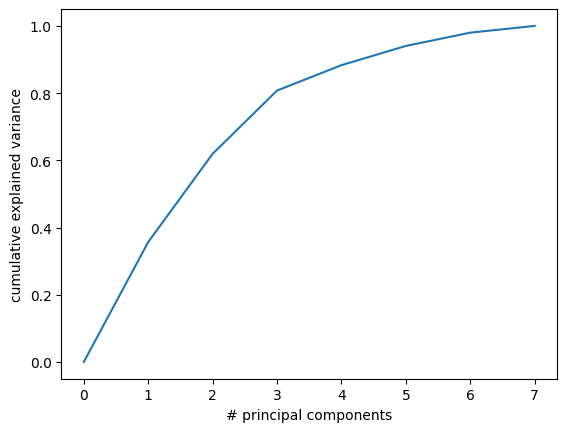

In [ ]:
# 第一個位置為第一主成份的變異，所以要加0在第一個位置
var_plot = [0] + pca_10d.explained_variance_ratio_.tolist()

cum_explained_var_ratio = np.cumsum(var_plot)
plt.plot(cum_explained_var_ratio)
plt.xlabel('# principal components')
plt.ylabel('cumulative explained variance')
#根據下面的圖 兩個component就可以有60%的解釋率了

### <span style="color:#3498DB">Question: 主成份代表什麼含義？</span>
主成分命名

In [ ]:
# 依照eigenvalue的大小排序共變異數矩陣的eigenvectors
pca = PCA(n_components=2, random_state=123)

# 注意我們是對標準化後的特徵做PCA
pca_trans = pca.fit_transform(df_scaled)

In [ ]:
pcs = np.array(pca.components_)

df_pc = pd.DataFrame(pcs, columns=df.columns[1:])
df_pc.index = [f"第{c}主成分" for c in['一', '二']]
df_pc.style\
    .background_gradient(cmap='PuBu', axis=None)\
    .format("{:.2}")

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
第一主成分,-0.31,-0.19,0.33,0.16,0.52,0.49,0.46
第二主成分,0.46,0.51,0.31,0.64,0.12,0.015,-0.07


* 第一主成分：多為男生，收入較高，住在規模較大的城市
* 第二主成分：非單身，失業，學歷較高

In [30]:
print(df['Sex'].isnull().sum())

0


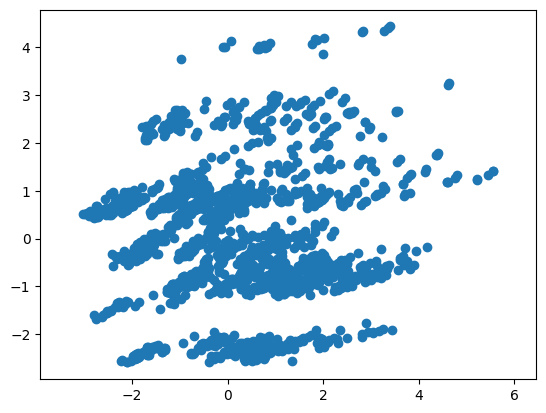

In [31]:
# 第一主成分顯示在 x 軸，第二主成分在 y 軸
plt.scatter(pca_trans[:, 0], pca_trans[:, 1])
plt.axis('equal');

In [32]:
factor_tb = pd.DataFrame(pca_trans, columns=['factor1', 'factor2'])

df_factor_tb = pd.concat([df.reset_index(drop=True), factor_tb], axis=1)
df_factor_tb

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,factor1,factor2
0,100000001,0,0,67,2,124670,1,2,2.514746,0.834122
1,100000002,1,1,22,1,150773,1,2,0.344935,0.598146
2,100000003,0,0,49,1,89210,0,0,-0.651063,-0.680093
3,100000004,0,0,45,1,171565,1,1,1.714316,-0.579927
4,100000005,0,0,53,1,149031,1,1,1.626745,-0.440496
...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,-0.866034,0.298330
1996,100001997,1,1,27,1,117744,1,0,-1.114957,0.794727
1997,100001998,0,0,31,0,86400,0,0,-1.452298,-2.235937
1998,100001999,1,1,24,1,97968,0,0,-2.241453,0.627108


In [43]:
import pandas as pd

# 定義轉換函數
def recod_sex_type(sex):
    if sex == 1:
        return 'Female'
    if sex == 0:
        return 'Male'
    else:
        return 'Others'

def recod_marital_type(marital):
    if marital == 1:
        return 'Single'
    if marital == 0:
        return 'Not Single'
    else:
        return 'Others'

# 應用轉換函數
df_factor_tb['Sex_type'] = df_factor_tb['Sex'].apply(recod_sex_type)
df_factor_tb['Marital_type'] = df_factor_tb['Marital status'].apply(recod_marital_type)

# 顯示唯一值
print(df_factor_tb['Sex_type'].unique())
print(df_factor_tb['Marital_type'].unique())


['Male' 'Female']
['Not Single' 'Single']


In [44]:
# 合併類型資訊
df_factor_tb['type'] = df_factor_tb['Sex_type'] + ' & ' + df_factor_tb['Marital_type']


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

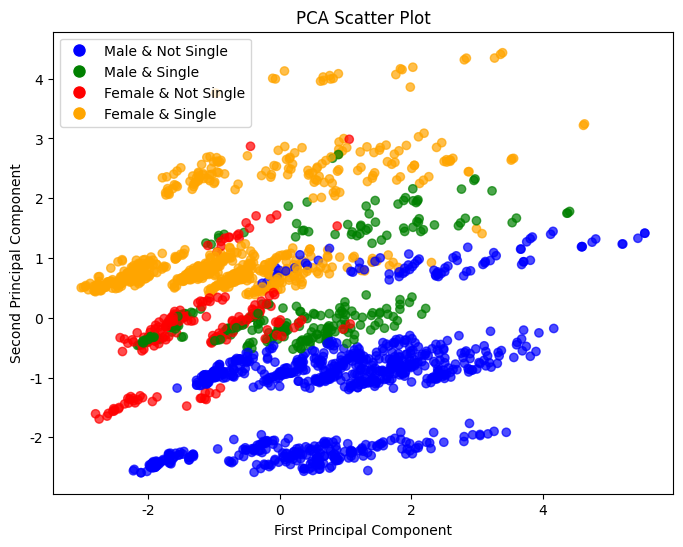

In [45]:
import matplotlib.pyplot as plt

# 顏色對應
colors = {
    'Male & Not Single': 'blue',
    'Male & Single': 'green',
    'Female & Not Single': 'red',
    'Female & Single': 'orange'
}

# 合併類型資訊
df_factor_tb['type'] = df_factor_tb['Sex_type'] + ' & ' + df_factor_tb['Marital_type']

# 使用類型欄位來設定顏色
color_labels = df_factor_tb['type'].map(colors)

# 繪製散點圖
plt.figure(figsize=(8, 6))
plt.scatter(df_factor_tb['factor1'], df_factor_tb['factor2'], c=color_labels, alpha=0.7)
plt.title("PCA Scatter Plot")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Male & Not Single'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Male & Single'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Female & Not Single'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Female & Single')
])
plt.show()
